___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

#### Load Dataset

In [212]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [213]:
df.rename(columns = {'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)

In [214]:
#drop unwanted columns
df = df.drop(columns=['CustomerID'])

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [215]:
df.shape

(200, 4)

In [216]:
#check for null values
df.isnull().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [217]:
#check for duplicat data
df.duplicated().sum()

0

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [219]:
df.dtypes

Gender            object
Age                int64
Annual Income      int64
Spending Score     int64
dtype: object

In [220]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


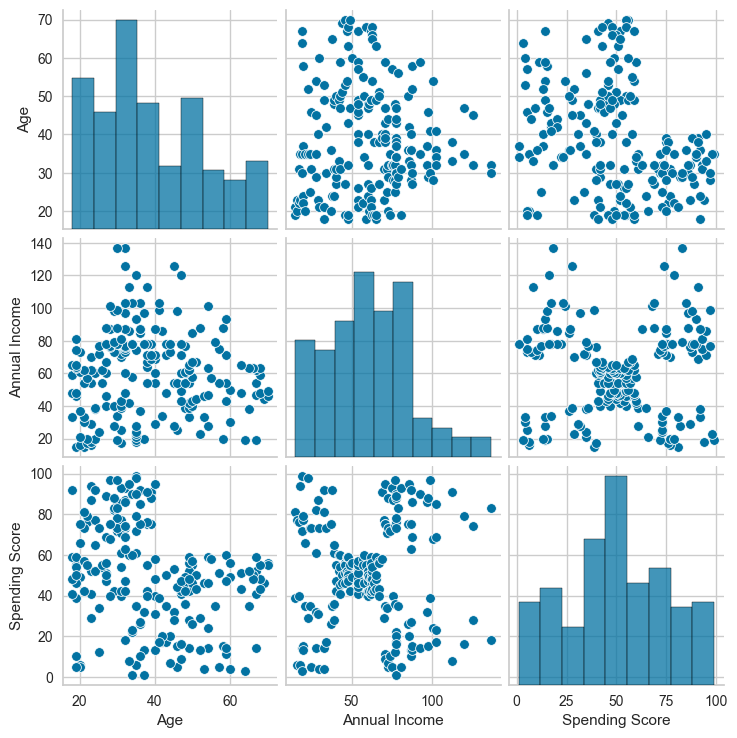

In [221]:
sns.pairplot(df)
plt.show()

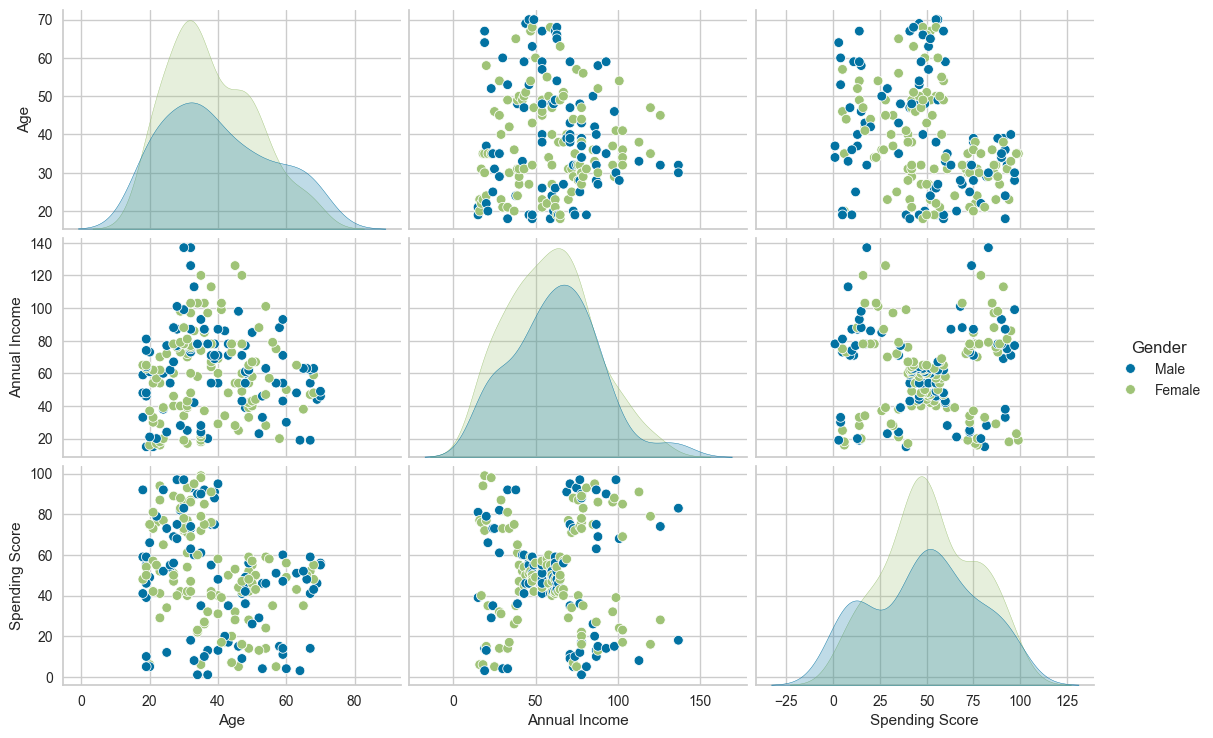

In [225]:
sns.pairplot(data=df, hue='Gender', aspect=1.5);

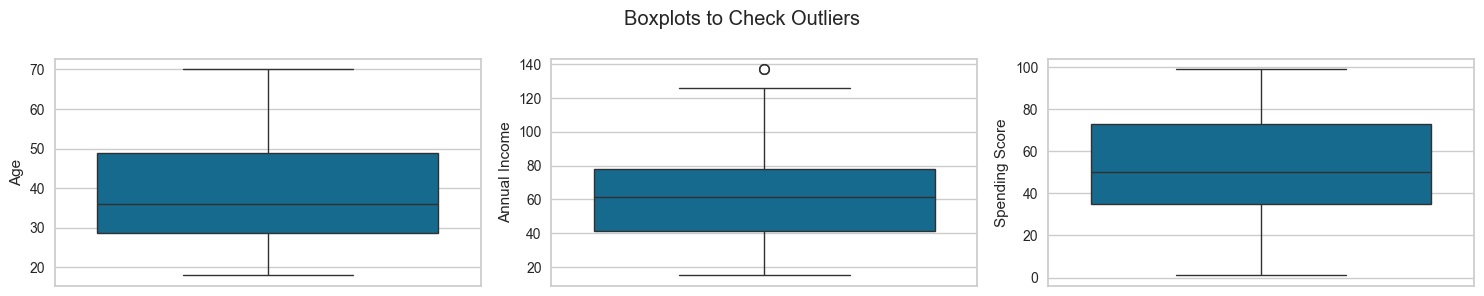

In [226]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income', 'Spending Score']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

In [227]:
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
        X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

## Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [228]:
# There is no train-test split because it is unsupervised learning!, and here we just want 2 columns as our dataset
df2 = df[['Age', 'Spending Score']].copy()

In [229]:
df2.head()

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


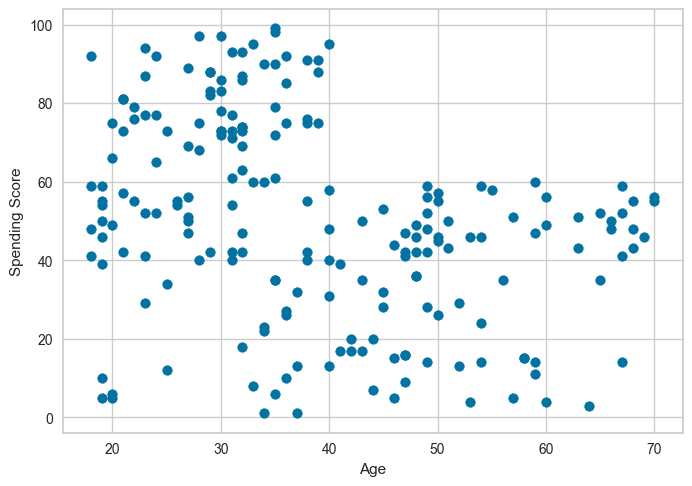

In [230]:
plt.scatter(df2['Age'], df2['Spending Score'])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

In [231]:
hopkins(df2, 1)

0.6982008389424872

#### *ii. Determine optimal number of clusters*

### Elbow method

In [232]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df2)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

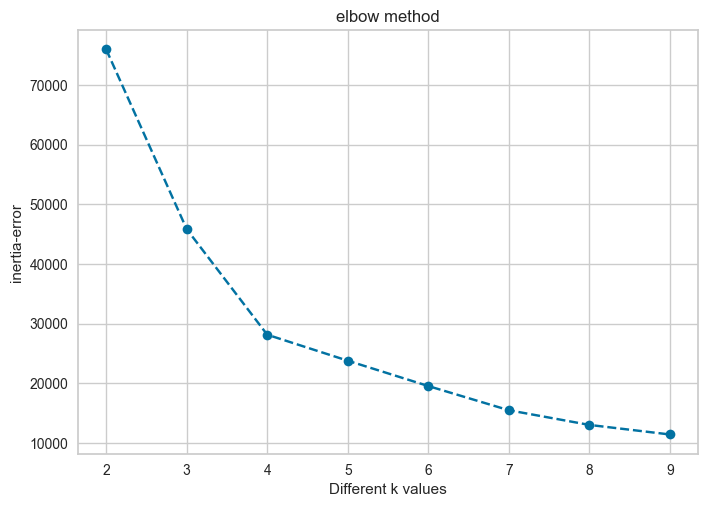

In [233]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [234]:
ssd # sum of squared distance

[75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23811.52352472089,
 19566.522341377608,
 15514.193134351035,
 13055.626865965576,
 11453.288911292719]

In [235]:
-pd.Series(ssd).diff()

0             NaN
1    30108.479394
2    17675.093049
3     4354.060042
4     4245.001183
5     4052.329207
6     2458.566268
7     1602.337955
dtype: float64

### way 2 (Elbow method using mean square distances)

In [236]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df2)
    distances = kmeanModel.transform(df2)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

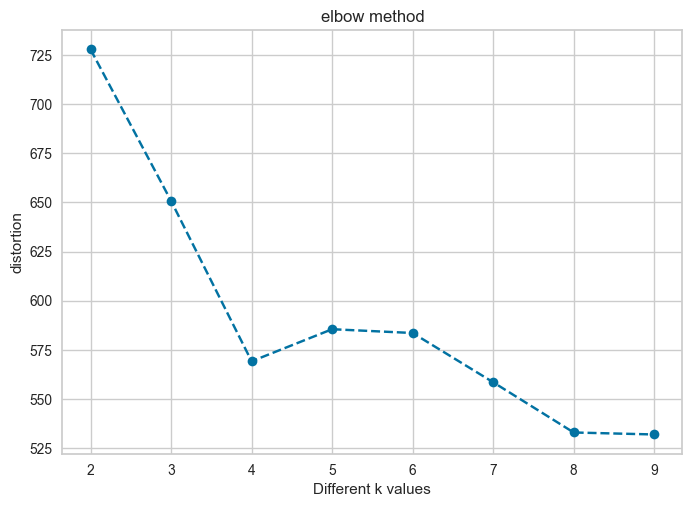

In [237]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 4 as the optimal k number for clustering.

### Silhouette analysis

#### Finding Silhouette Scores for Each Cluster

In [238]:
# calculate the score for each cluster
# Set range of clusters you prefer to test on
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.44526667994351227
For n_clusters=6, the silhouette score is 0.44845919861907363
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.4280182657184854
For n_clusters=9, the silhouette score is 0.41447652571263843


In [239]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [240]:
# calculate the score for all clusters
silhouette_score(df2, K_means_model_ageSpending.labels_)
#this method use the mean
# as long as we have a positive score is good

0.49973941540141753

In [241]:
K_means_model_ageSpending.n_clusters

4

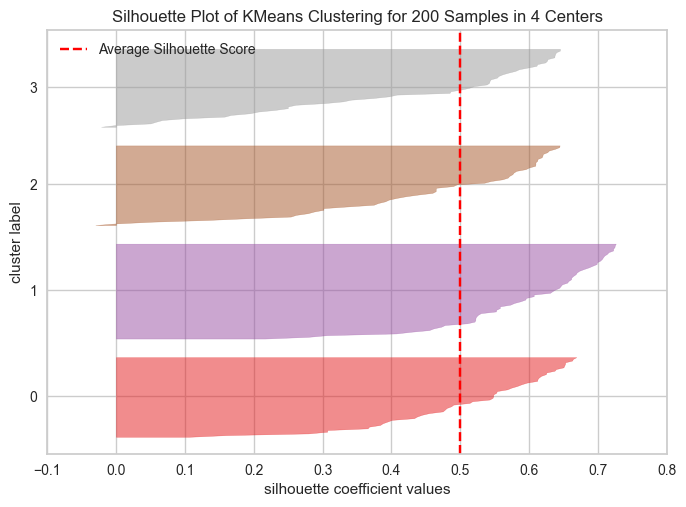

In [242]:
visualizer = SilhouetteVisualizer(K_means_model_ageSpending)
visualizer.fit(df2)    
visualizer.poof();

#### Why silhouette_score is negative?

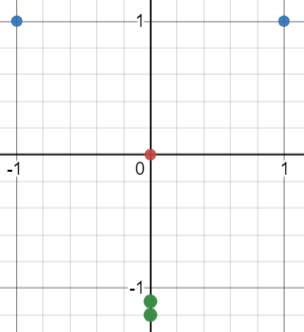

In [243]:
'''
silhouette_score = (b-a)/max(a,b) 
#The Silhouette Coefficient is calculated using the mean intra-cluster distance(a)
#  and the mean nearest-cluster distance(b) for each sample.
#  The Silhouette Coefficient for a sample is (b - a) / max(a, b).
#  To clarify, b is the distance between a sample and the nearest cluster that 
#  the sample is not a part of.

#b : the mean nearest-cluster distance 
#a : the mean intra-cluster distance 

for red point, 

b = 1 
a = ((1+1)**0.5 + (1+1)**0.5)/2  

silhouette_score = (1-1.41)/1.41 
'''

'\nsilhouette_score = (b-a)/max(a,b) \n#The Silhouette Coefficient is calculated using the mean intra-cluster distance(a)\n#  and the mean nearest-cluster distance(b) for each sample.\n#  The Silhouette Coefficient for a sample is (b - a) / max(a, b).\n#  To clarify, b is the distance between a sample and the nearest cluster that \n#  the sample is not a part of.\n\n#b : the mean nearest-cluster distance \n#a : the mean intra-cluster distance \n\nfor red point, \n\nb = 1 \na = ((1+1)**0.5 + (1+1)**0.5)/2  \n\nsilhouette_score = (1-1.41)/1.41 \n'

#### *iii. Apply K Means*

In [244]:
K_means_model_ageSpending = KMeans(n_clusters=4, random_state=42)

In [245]:
K_means_model_ageSpending.fit(df2)

KMeans(n_clusters=4, random_state=42)

In [246]:
K_means_model_ageSpending.fit_predict(df2)
#fit_predict it is a combination between fit and predict

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [247]:
K_means_model_ageSpending.labels_

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [248]:
df_as_new = df2.copy()
df_as_new["cluster_Kmeans"] = K_means_model_ageSpending.fit_predict(df2) #kmeans.labels_
df_as_new


,Age,Spending Score,cluster_Kmeans
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

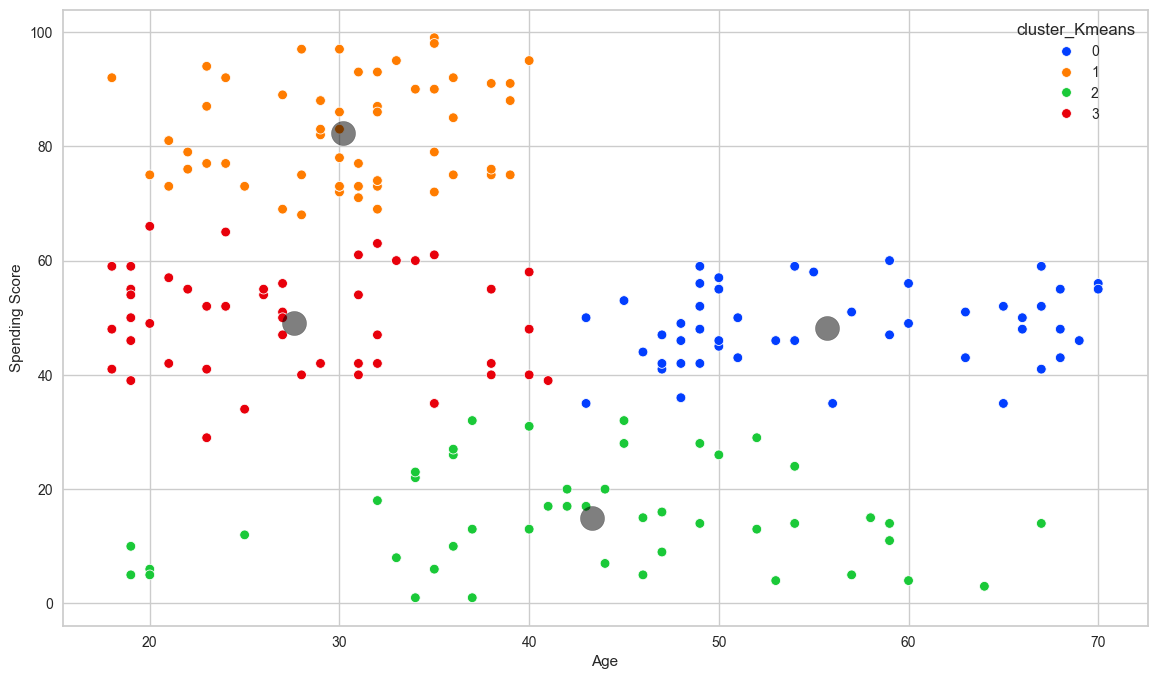

In [249]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Age',
                y='Spending Score',
                hue='cluster_Kmeans',
                data=df_as_new,
                palette="bright")

centers = K_means_model_ageSpending.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

## Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [250]:
df3 = df[['Annual Income', 'Spending Score']].copy()

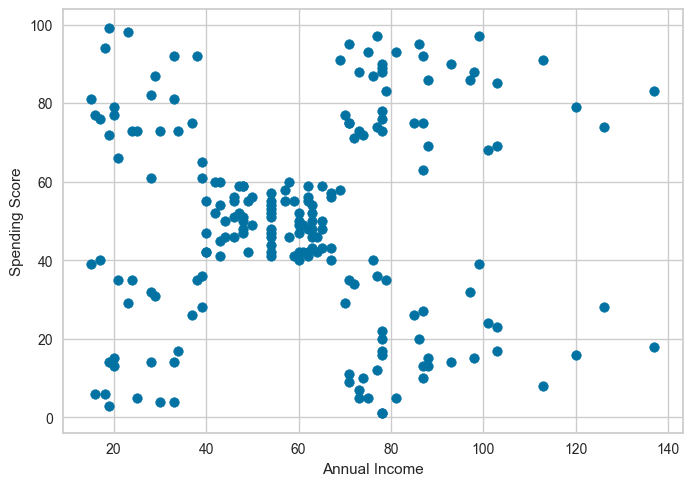

In [251]:
plt.scatter(df3['Annual Income'], df3['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show();

In [252]:
hopkins(df3, 1)

0.6911926942149632

#### *ii. Determine optimal number of clusters*

In [253]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(df3)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

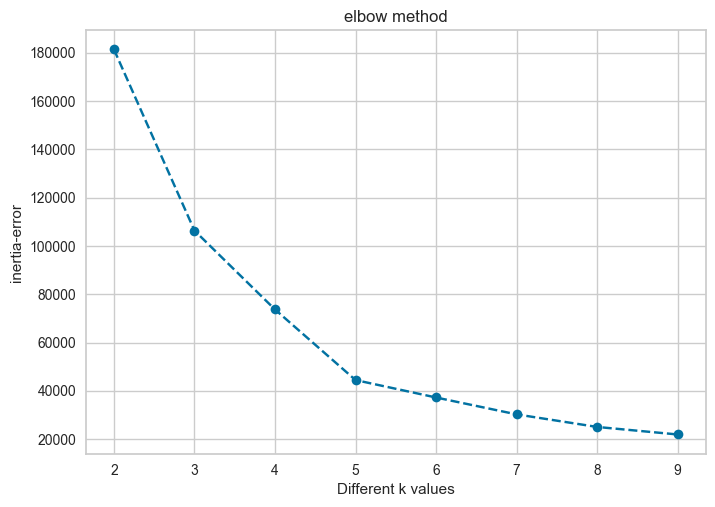

In [254]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [255]:
ssd

[181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30241.343617936585,
 25036.417604033984,
 21916.794789843727]

In [256]:
-pd.Series(ssd).diff()

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6992.470893
6     5204.926014
7     3119.622814
dtype: float64

### way 2 (Elbow method using mean square distances)

In [257]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(df3)
    distances = kmeanModel.transform(df3)
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] 
        result.append(np.mean(cluster_distances ** 2)) 
    distortion.append(sum(result))

Text(0.5, 1.0, 'elbow method')

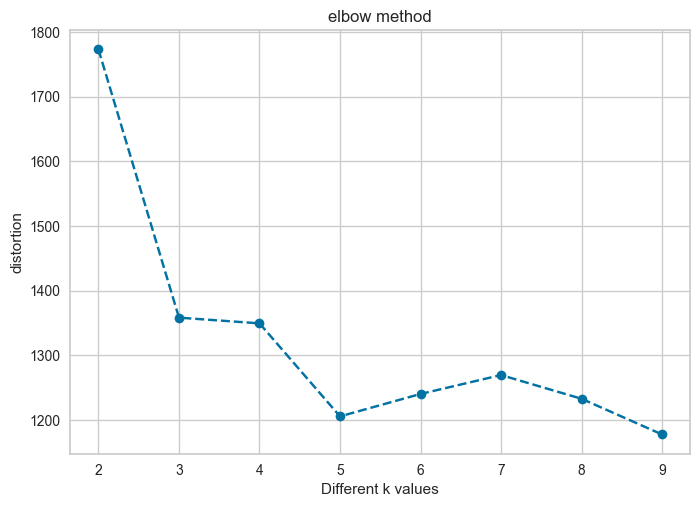

In [258]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

Both elbow tests have k = 5 as the optimal k number for clustering.

### Silhouette analysis

#### Finding Silhouette Scores for Each Cluster

In [259]:
range_n_clusters = range(2,10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(df3)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(df3, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5288104473798049
For n_clusters=8, the silhouette score is 0.45481197931195283
For n_clusters=9, the silhouette score is 0.4561091950997367


In [260]:
K_means_model_incomeSpending = KMeans(n_clusters=5, random_state=42)
K_means_model_incomeSpending.fit(df3)

KMeans(n_clusters=5, random_state=42)

In [261]:
silhouette_score(df2, K_means_model_incomeSpending.labels_)

0.1632888738101461

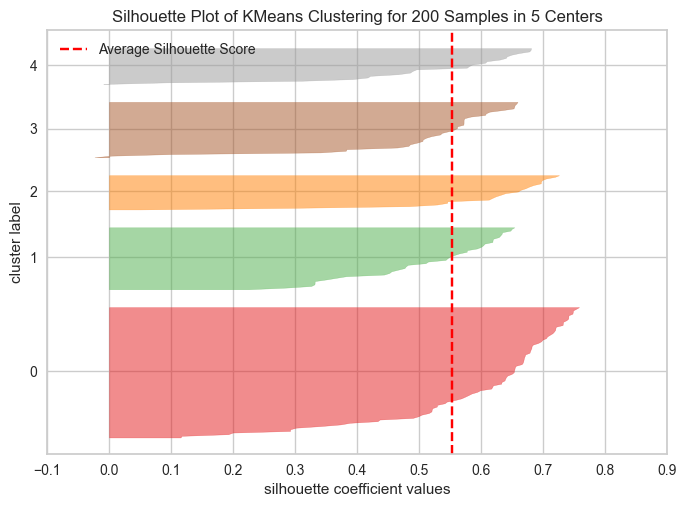

In [262]:
visualizer = SilhouetteVisualizer(K_means_model_incomeSpending)
visualizer.fit(df3)    
visualizer.poof();

#### *iii. Apply K Means*

In [263]:
K_means_model_incomeSpending = KMeans(n_clusters=5, random_state=42)

In [264]:
K_means_model_incomeSpending.fit(df3)

KMeans(n_clusters=5, random_state=42)

In [265]:
K_means_model_incomeSpending.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [266]:
df_ins_new = df3.copy()
df_ins_new["cluster_Kmeans"] = K_means_model_incomeSpending.fit_predict(df3) #kmeans.labels_
df_ins_new

,Annual Income,Spending Score,cluster_Kmeans
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


#### *iv. Visualizing and Labeling All the Clusters*

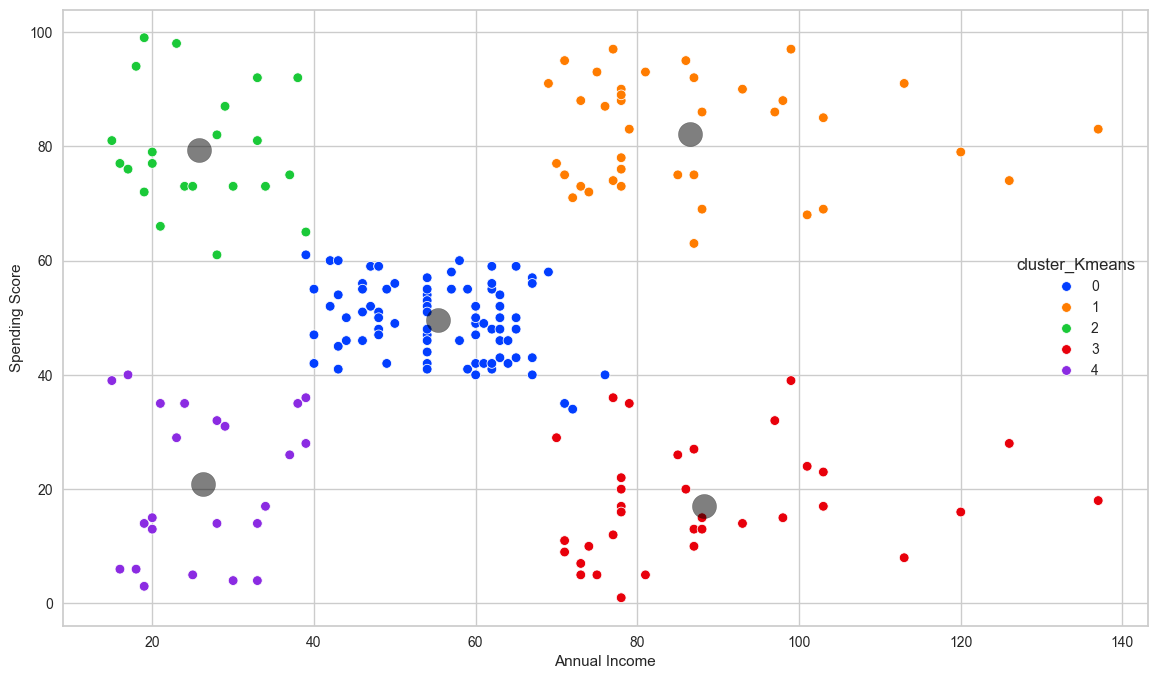

In [267]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='Annual Income',
                y='Spending Score',
                hue='cluster_Kmeans',
                data=df_ins_new,
                palette="bright")

centers = K_means_model_incomeSpending.cluster_centers_
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=300,
            alpha=0.5)

## Hierarchical Clustering

### Clustering based on Age and Spending Score- x1

#### *i. Determine optimal number of clusters using Dendogram*

In [268]:
df2

,Age,Spending Score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [269]:
hc_ward = linkage(df2, method="ward")
hc_complete = linkage(df2, "complete")
hc_average = linkage(df2, "average")
hc_single = linkage(df2, "single")
# We give our data and information on how to measure
# distances to the linkage function to give it to the dendogram.

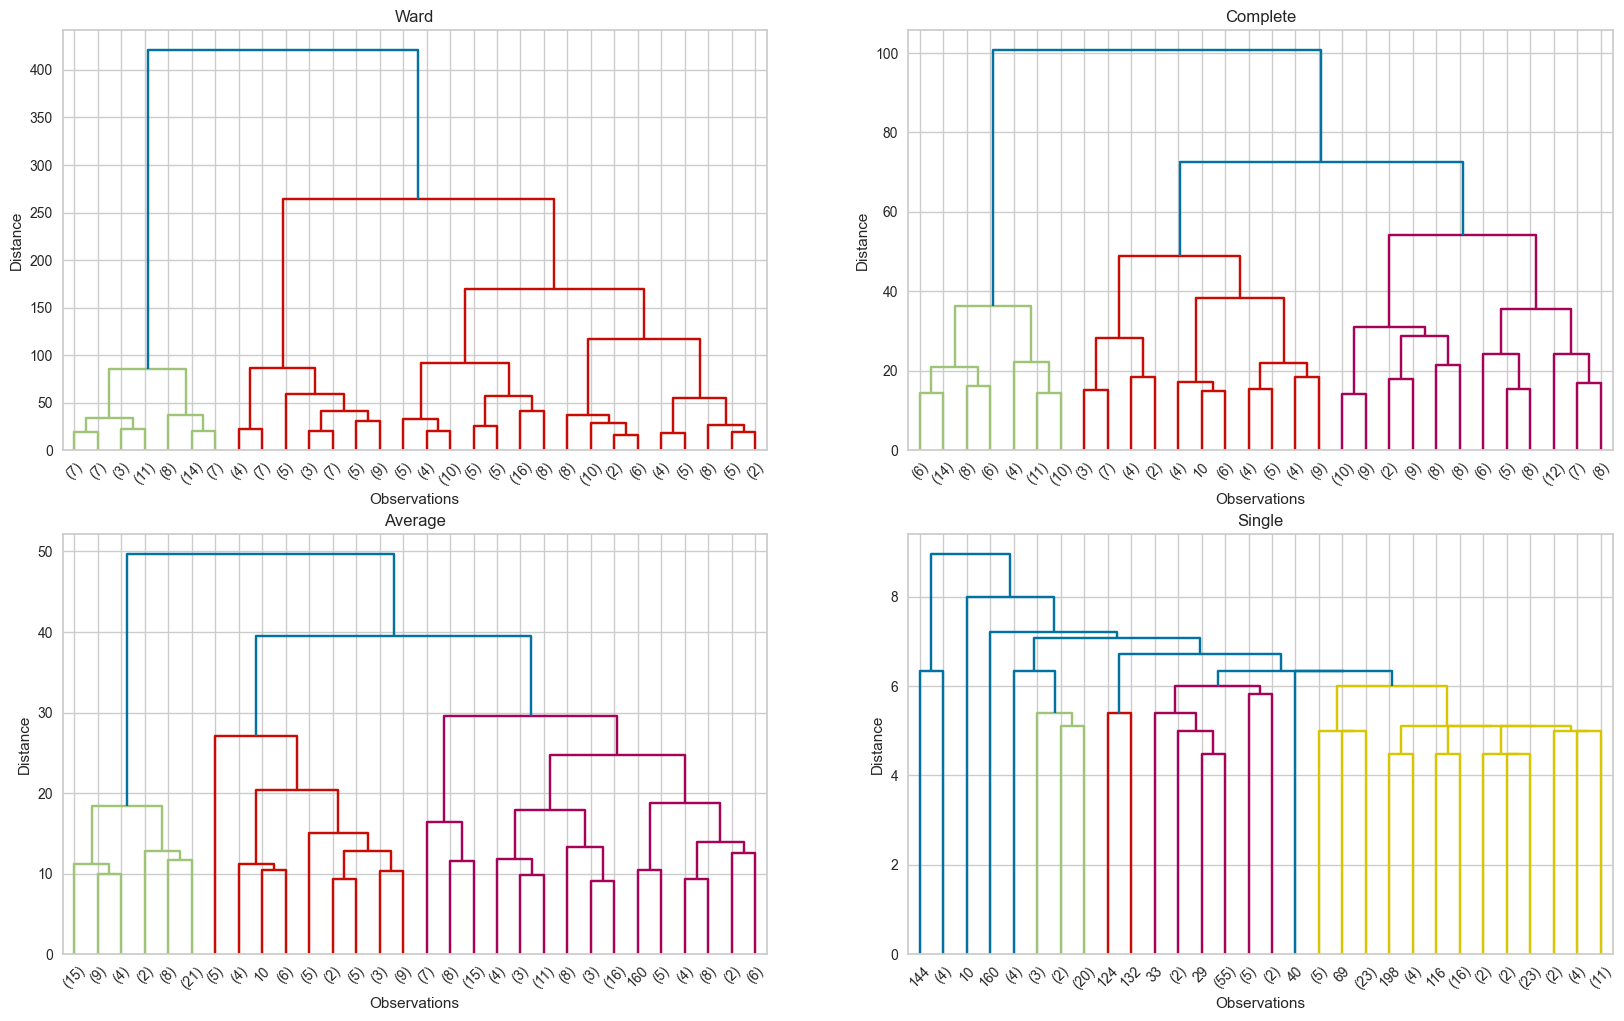

In [270]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp');

from the graph we can say that 2 or 3 clusters are good for our dataset

#### ii. *Apply Agglomerative Clustering*

##### S(Silhouette) Score

In [271]:
# we do not have the ground truth labels, so evaluation must be performed using the model itself.
# (One of the evaluation method is Silhouette Coefficient)

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(df2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df2, model.labels_)}')

#from the results we can see that 2-4 clusters have the best scores

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


##### 2 clusters

In [272]:
model_as = AgglomerativeClustering(n_clusters=2,
                                metric="euclidean",
                                linkage="ward")

In [273]:
model_as.fit_predict(df2)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [274]:
model_as.labels_

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

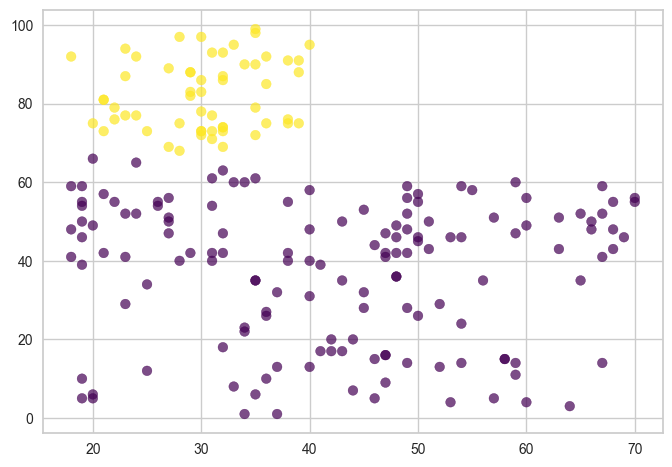

In [275]:
plt.scatter(df2["Age"],
            df2["Spending Score"],
            c=model_as.labels_,
            cmap="viridis",
            alpha=0.7)

##### 3 clusters

In [276]:
model2_as = AgglomerativeClustering(n_clusters=3,
                                metric="euclidean",
                                linkage="ward")

In [277]:
model2_as.fit_predict(df2)

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

In [278]:
model2_as.labels_

array([0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 1,
       2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1,
       2, 1], dtype=int64)

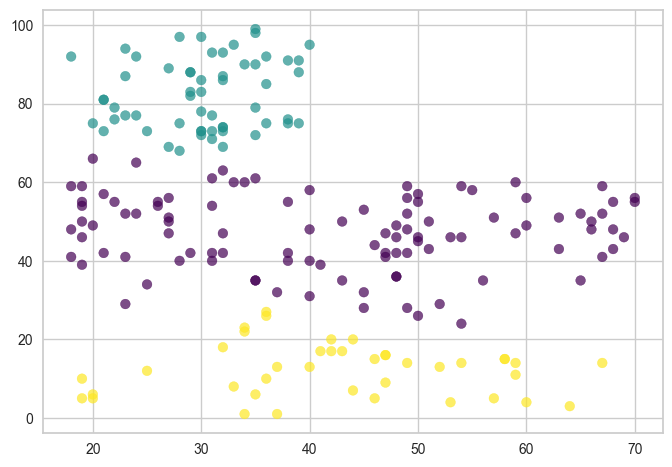

In [279]:
plt.scatter(df2["Age"],
            df2["Spending Score"],
            c=model2_as.labels_,
            cmap="viridis",
            alpha=0.7)

##### 4 clusters

In [280]:
model3_as = AgglomerativeClustering(n_clusters=4,
                                metric="euclidean",
                                linkage="ward")

In [281]:
clusters_as = model3_as.fit_predict(df2)

In [282]:
model3_as.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

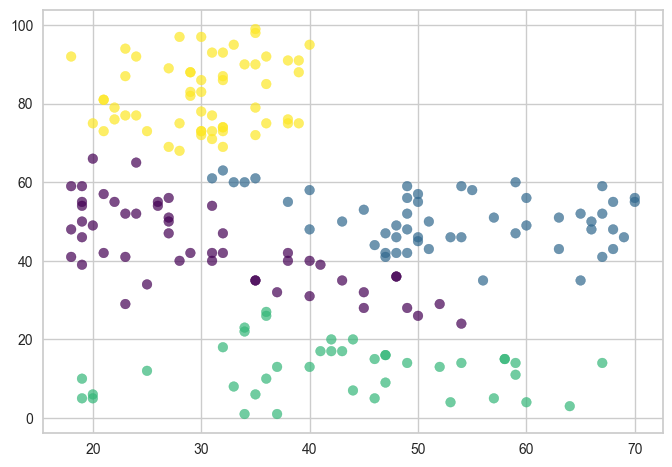

In [283]:
plt.scatter(df2["Age"],
            df2["Spending Score"],
            c=model3_as.labels_,
            cmap="viridis",
            alpha=0.7)

#### iii. *Visualizing and Labeling All the Clusters* 

In [284]:
df_as_new["cluster_agg"] = clusters_as # for the choice of 3 clusters
df_as_new.head()

,Age,Spending Score,cluster_Kmeans,cluster_agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0


<Figure size 2000x1000 with 0 Axes>

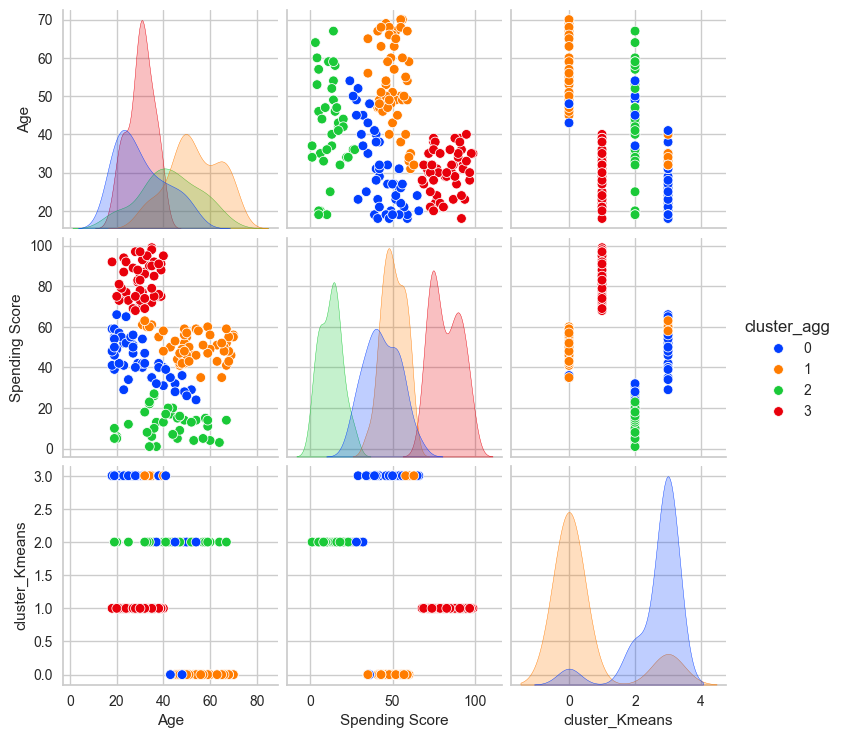

In [285]:
plt.figure(figsize=(20,10))
sns.pairplot(df_as_new, hue="cluster_agg", palette="bright");

<Axes: xlabel='Age', ylabel='Spending Score'>

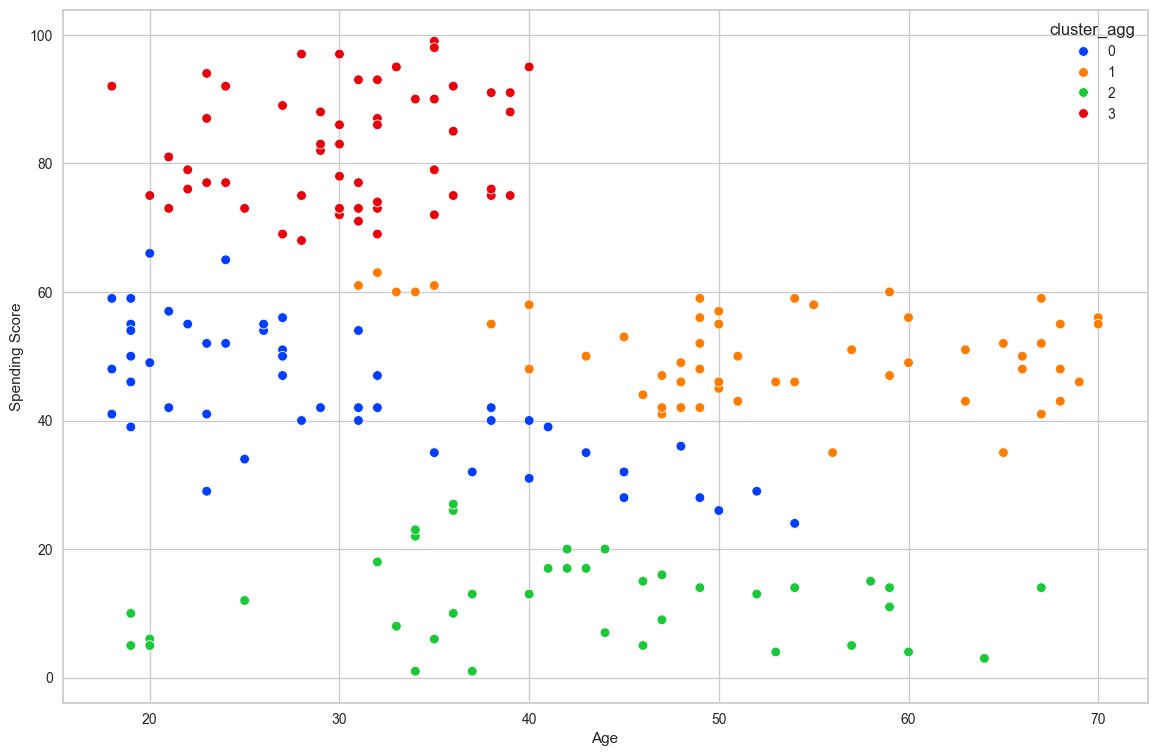

In [286]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending Score',
                hue='cluster_agg',
                data=df_as_new,
                palette="bright")

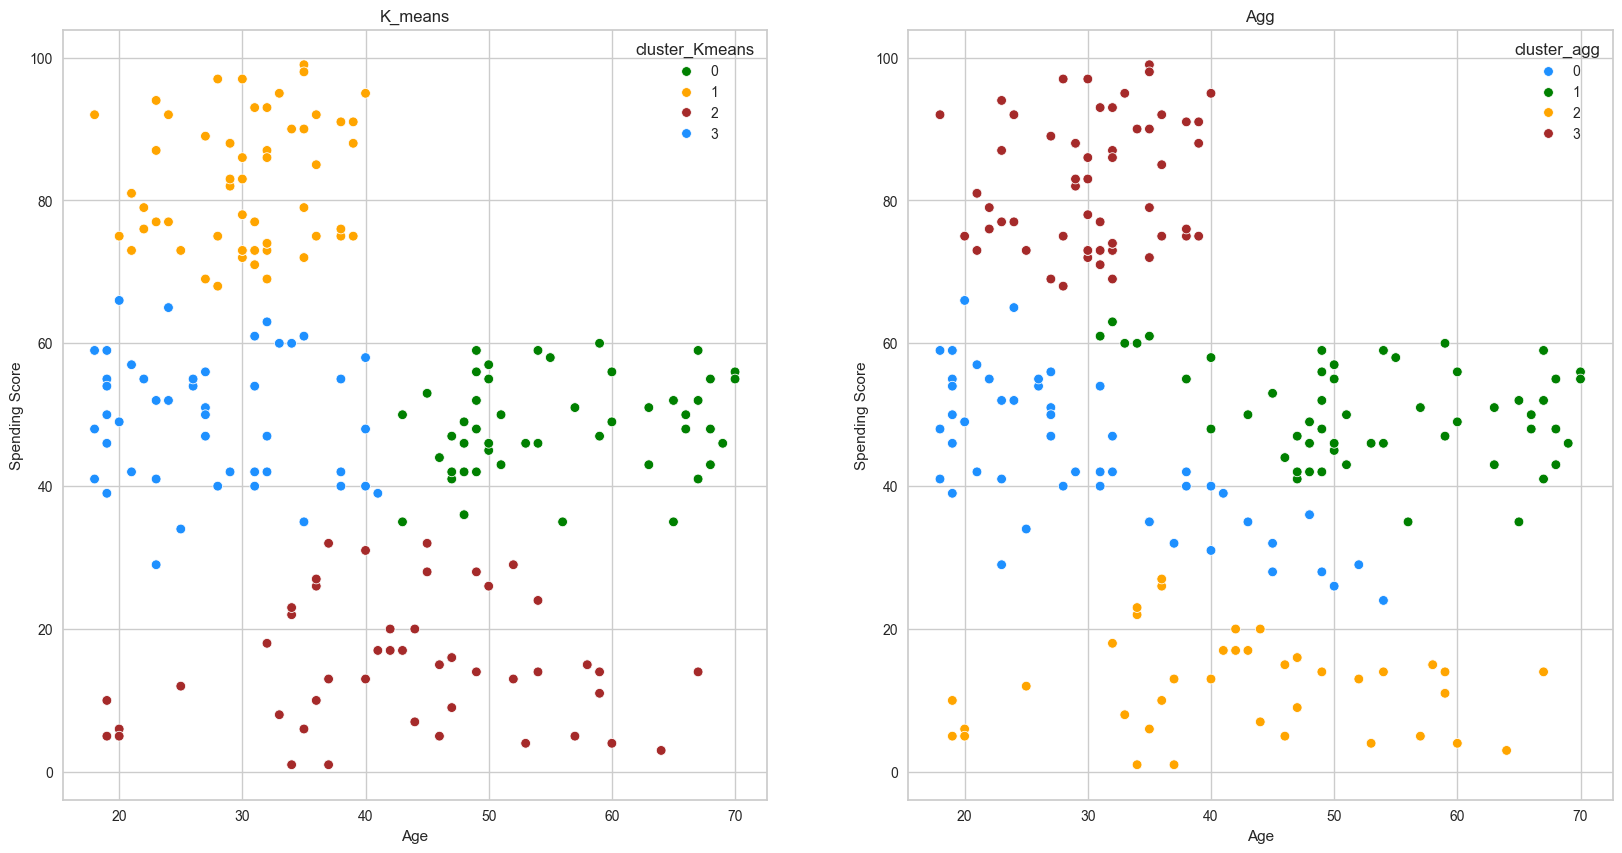

In [287]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='Spending Score',
                hue='cluster_Kmeans',
                data=df_as_new,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")

plt.subplot(122)
sns.scatterplot(x='Age',
                y='Spending Score',
                hue='cluster_agg',
                data=df_as_new,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agg");

### Clustering based on Annual Income and Spending Score- x2

#### *i. Determine optimal number of clusters using Dendogram*

In [288]:
df3

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


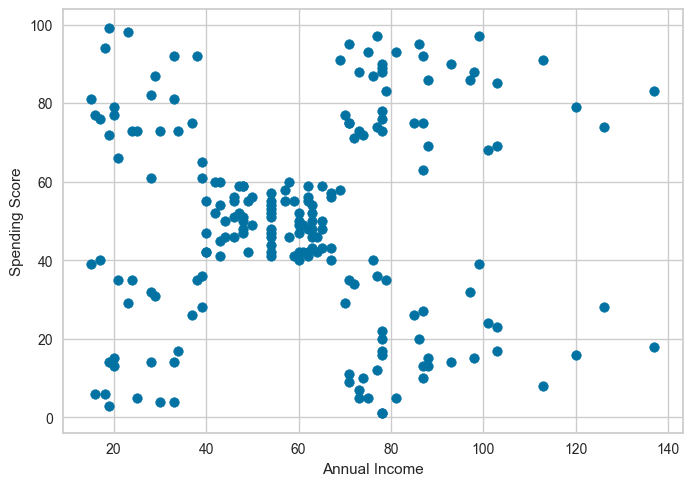

In [289]:
plt.scatter(df3['Annual Income'], df3['Spending Score'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show();

In [290]:
hc_ward = linkage(df3, method="ward")
hc_complete = linkage(df3, "complete")
hc_average = linkage(df3, "average")
hc_single = linkage(df3, "single")
# We give our data and information on how to measure
# distances to the linkage function to give it to the dendogram.

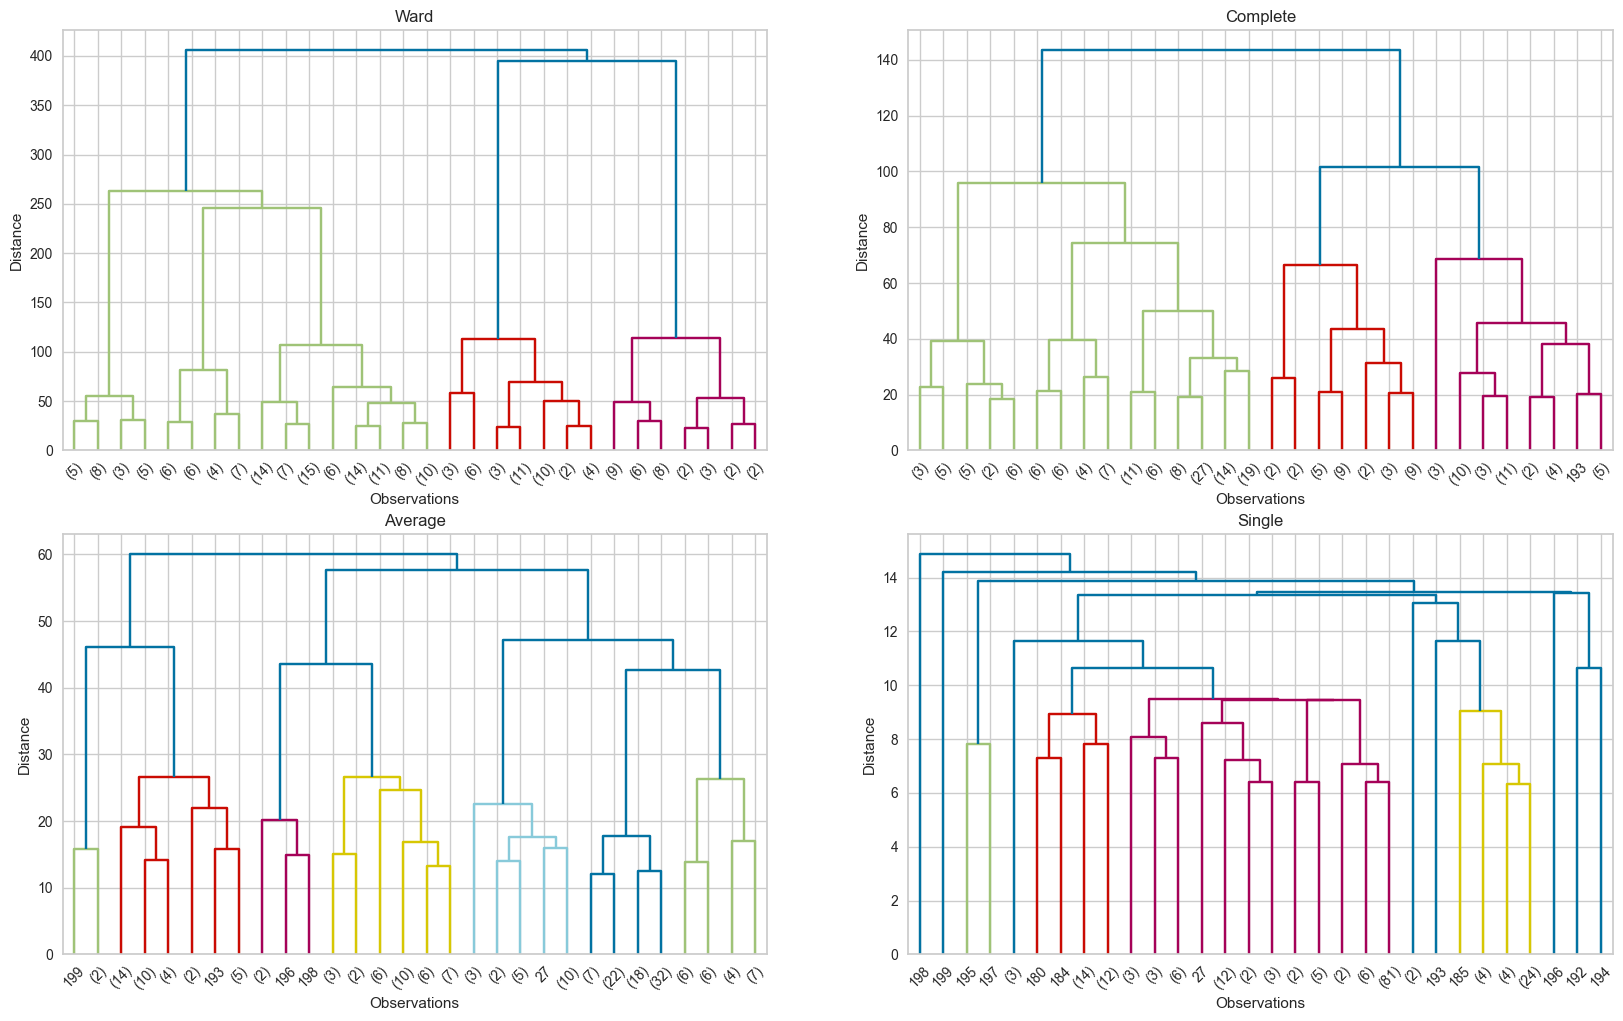

In [291]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp')

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp');

according to the ward linkage and the scatter plot,we can say that 3 or 5 clusters are good for our dataset

#### ii. *Apply Agglomerative Clustering*

##### S(Silhouette) Score

In [292]:
# we do not have the ground truth labels, so evaluation must be performed using the model itself.
# (One of the evaluation method is Silhouette Coefficient)

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(df3)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df3, model.labels_)}')

#from the results we can see that 5 clusters has the best scores

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


##### 5 clusters

In [293]:
model_ins = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")

In [294]:
clusters_ins = model_ins.fit_predict(df3)

In [295]:
model_ins.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

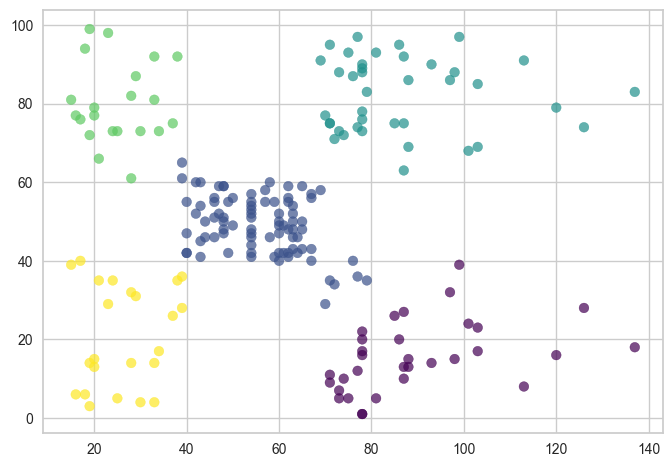

In [296]:
plt.scatter(df3["Annual Income"],
            df3["Spending Score"],
            c=model_ins.labels_,
            cmap="viridis",
            alpha=0.7)

#### iii. *Visualizing and Labeling All the Clusters* 

In [297]:
df_ins_new["cluster_agg"] = clusters_ins # for the choice of 3 clusters
df_ins_new.head()

,Annual Income,Spending Score,cluster_Kmeans,cluster_agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4


<Figure size 2000x1000 with 0 Axes>

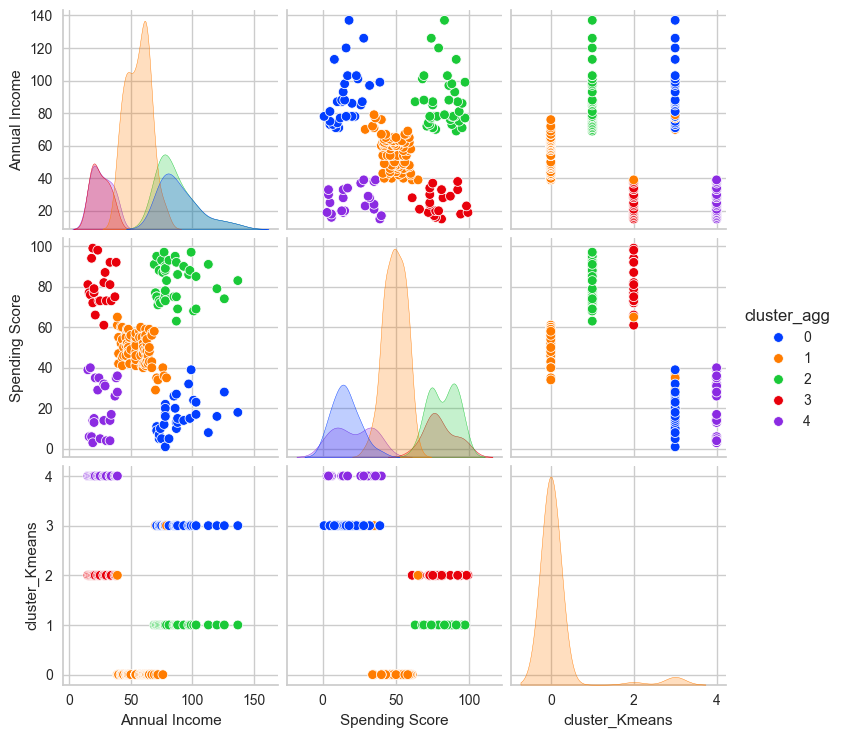

In [298]:
plt.figure(figsize=(20,10))
sns.pairplot(df_ins_new, hue="cluster_agg", palette="bright");

<Axes: xlabel='Annual Income', ylabel='Spending Score'>

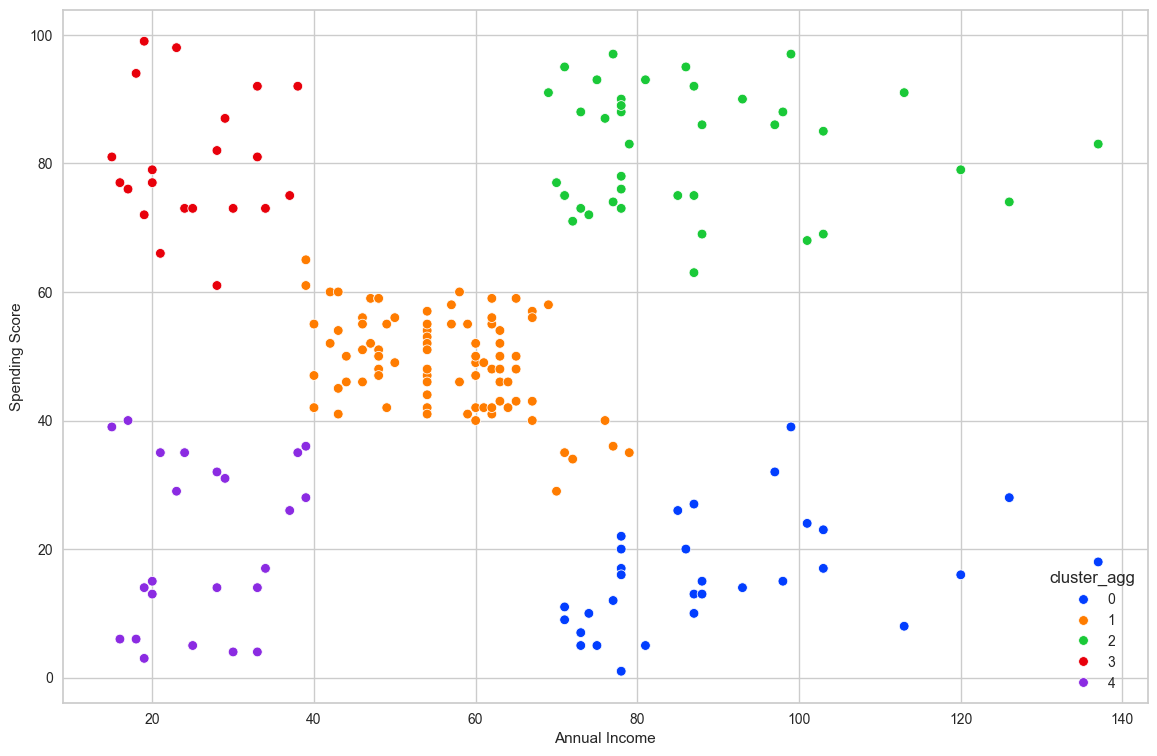

In [299]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Annual Income',
                y='Spending Score',
                hue='cluster_agg',
                data=df_ins_new,
                palette="bright")

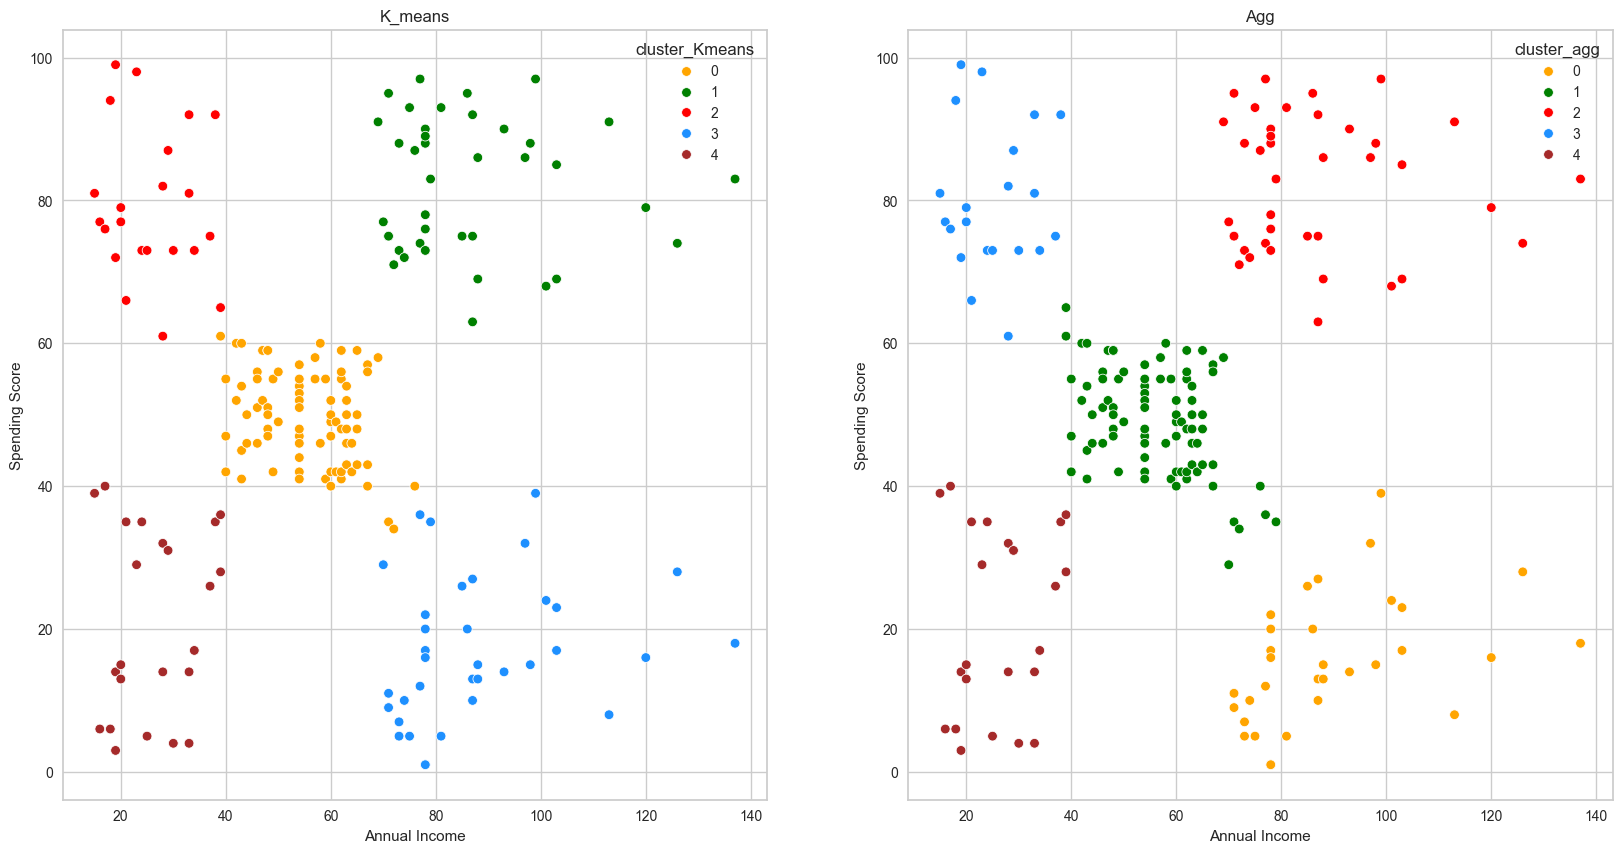

In [315]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Annual Income',
                y='Spending Score',
                hue='cluster_Kmeans',
                data=df_ins_new,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("K_means")

plt.subplot(122)
sns.scatterplot(x='Annual Income',
                y='Spending Score',
                hue='cluster_agg',
                data=df_ins_new,
                palette=['orange', 'green', 'red', 'dodgerblue', 'brown'])
plt.title("Agg");

## Interpretation based on Age and Spending Score- x1

In [301]:
df_as_new

,Age,Spending Score,cluster_Kmeans,cluster_agg
0,19,39,3,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,3,0
...,...,...,...,...
195,35,79,1,3
196,45,28,2,0
197,32,74,1,3
198,32,18,2,2


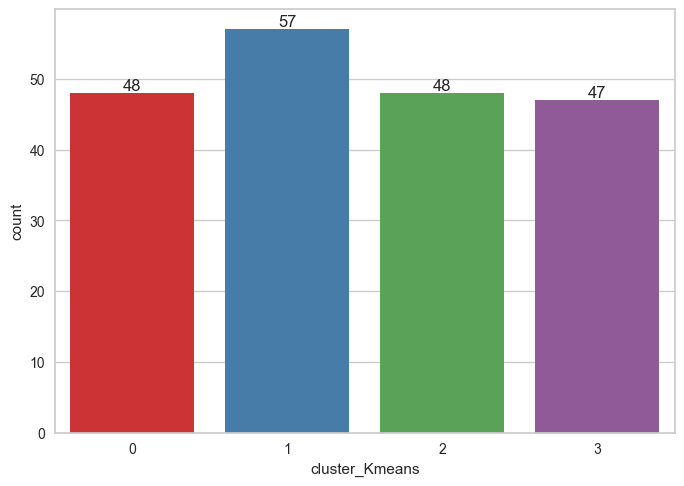

In [302]:
#how many people in each cluster
ax = sns.countplot(x='cluster_Kmeans', data=df_as_new, palette = "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [303]:
df12 = df.copy()

In [304]:
df12["cluster_Age_Spending_Score"] = df_as_new.cluster_Kmeans
df12.head()

,Gender,Age,Annual Income,Spending Score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,3


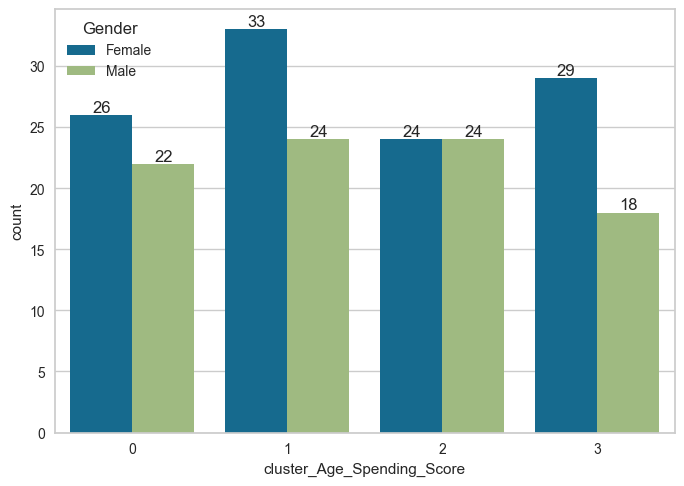

In [305]:
ax = sns.countplot(x="cluster_Age_Spending_Score", data= df12, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# distribution of clusters by gender
#we can see that in clusters 0-1-3, females are more than males
#and in average we have more females than males in our dataset

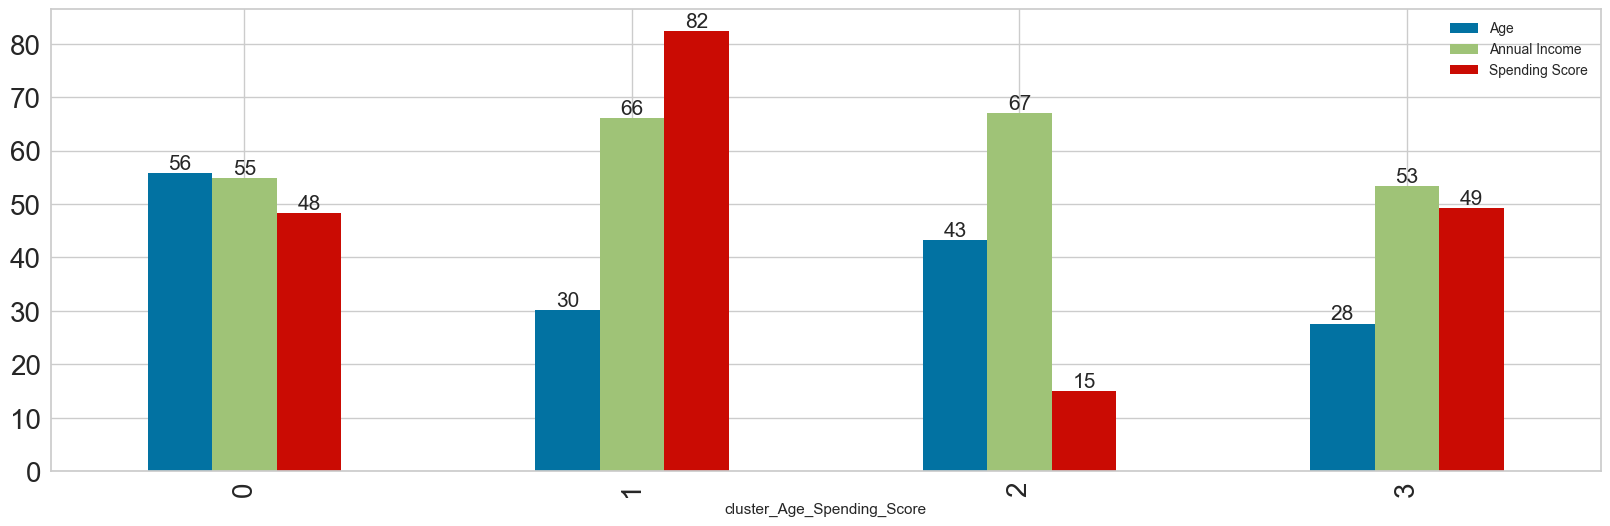

In [306]:
ax = df12.drop(columns = 'Gender').groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

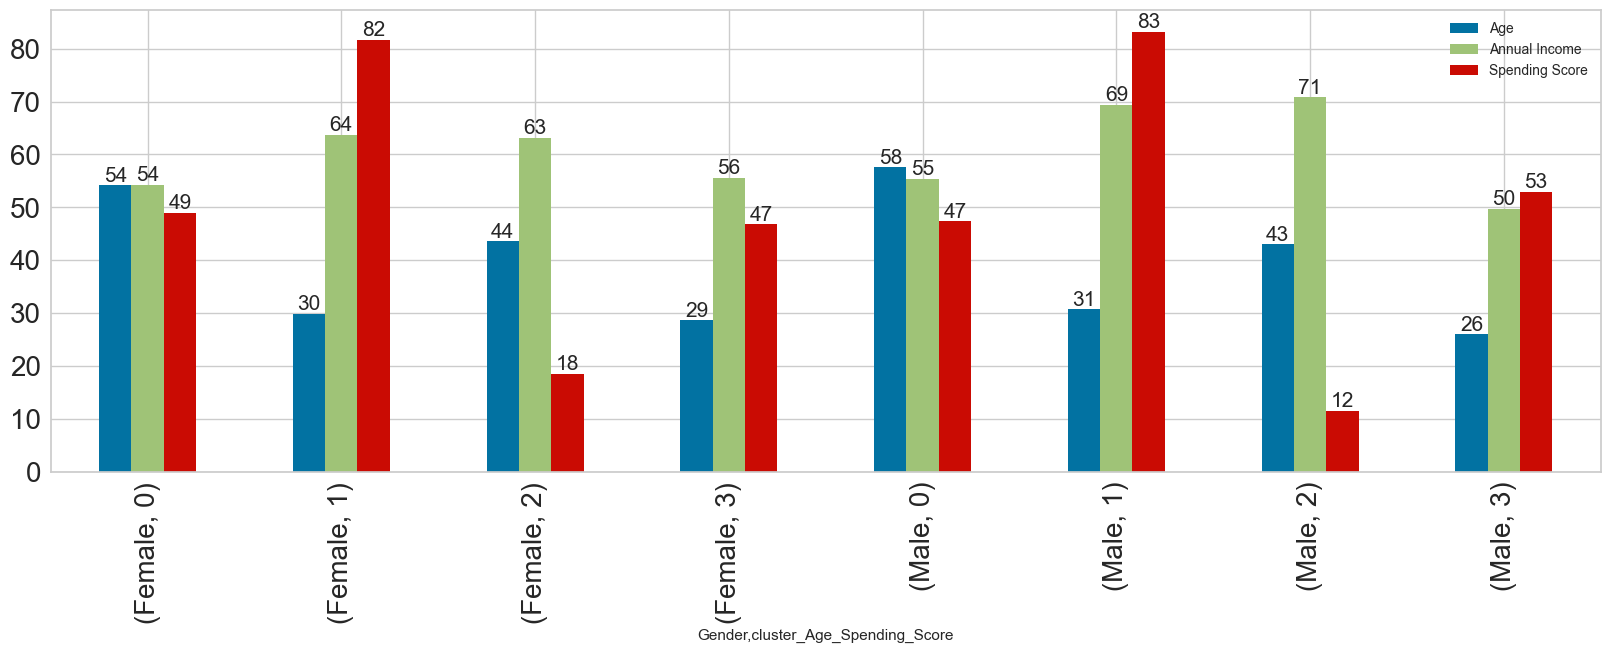

In [307]:
ax = df12.groupby(["Gender", "cluster_Age_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)

for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

#here we are gong to use .groupby().mean() in order to interpretate the model results with clusters

### Conclusion

**cluster 0** : The average age is around 56, for females, they seems to have slightly less annula_income but higher spending_scores. however,  the overall results in cluster 0 are in average and we can do some thing to incease their activity and loyality.

**cluster 1**: The average age is around 30, the males are having more annula_income and spending_scoresis than females high but they are both higher than any other clusters, so that tell us that this cluster include our loyal customers and we work on keep them and give them a special treatment.

**cluster 2** :The average age is around 43. The annula_income is very high and spending_scores are very low in both gender. that is mean that they are our tharget customers that we wanted to identefies, we need to work on a strategic plan to make them increase their scores.  
    
**cluster 3**: The average age is around 28. for females, they seems to have higher annula_income but less spending_scores. however,  the overall results in cluster 3 are in average and we can do some thing to incease their activity and loyality.

## Interpretation based on Annual Income and Spending Score- x2

In [308]:
df_ins_new

,Annual Income,Spending Score,cluster_Kmeans,cluster_agg
0,15,39,4,4
1,15,81,2,3
2,16,6,4,4
3,16,77,2,3
4,17,40,4,4
...,...,...,...,...
195,120,79,1,2
196,126,28,3,0
197,126,74,1,2
198,137,18,3,0


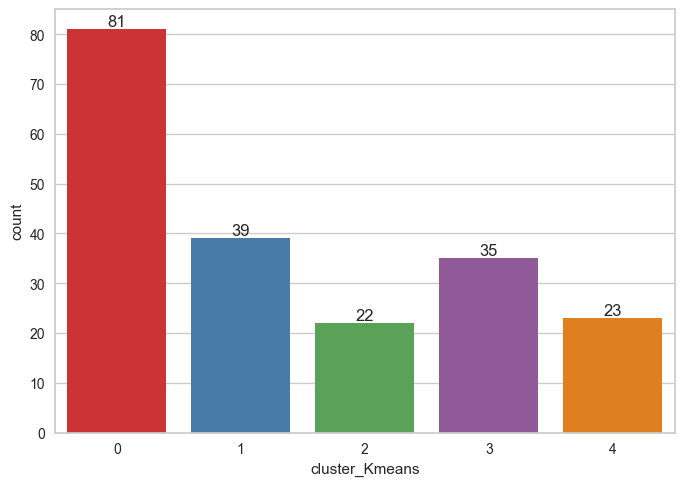

In [309]:
#how many people in each cluster
ax = sns.countplot(x='cluster_Kmeans', data=df_ins_new, palette = "Set1")
for label in ax.containers:
    ax.bar_label(label)
plt.show()

In [310]:
df13 = df.copy()

In [311]:
df13["cluster_Annual_Income_Spending_Score"] = df_ins_new.cluster_Kmeans
df13.head()

,Gender,Age,Annual Income,Spending Score,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,4
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,4


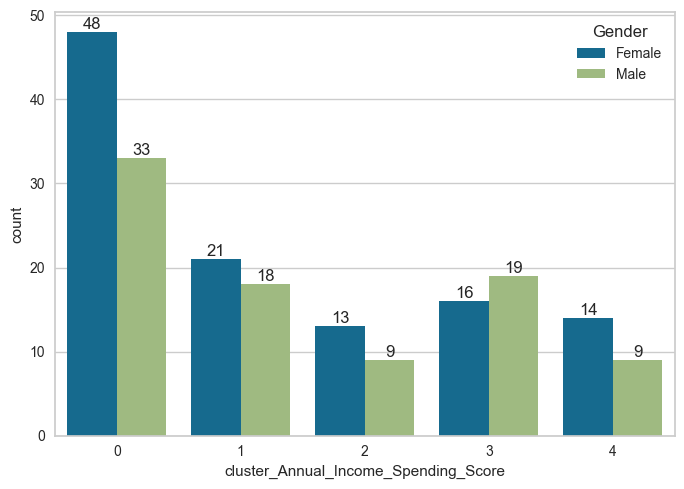

In [312]:
ax = sns.countplot(x="cluster_Annual_Income_Spending_Score", data= df13, hue = "Gender")
for p in ax.containers:
    ax.bar_label(p)

# distribution of clusters by gender
#we can see that in clusters 0-1-3, females are more than males
#and in average we have more females than males in our dataset

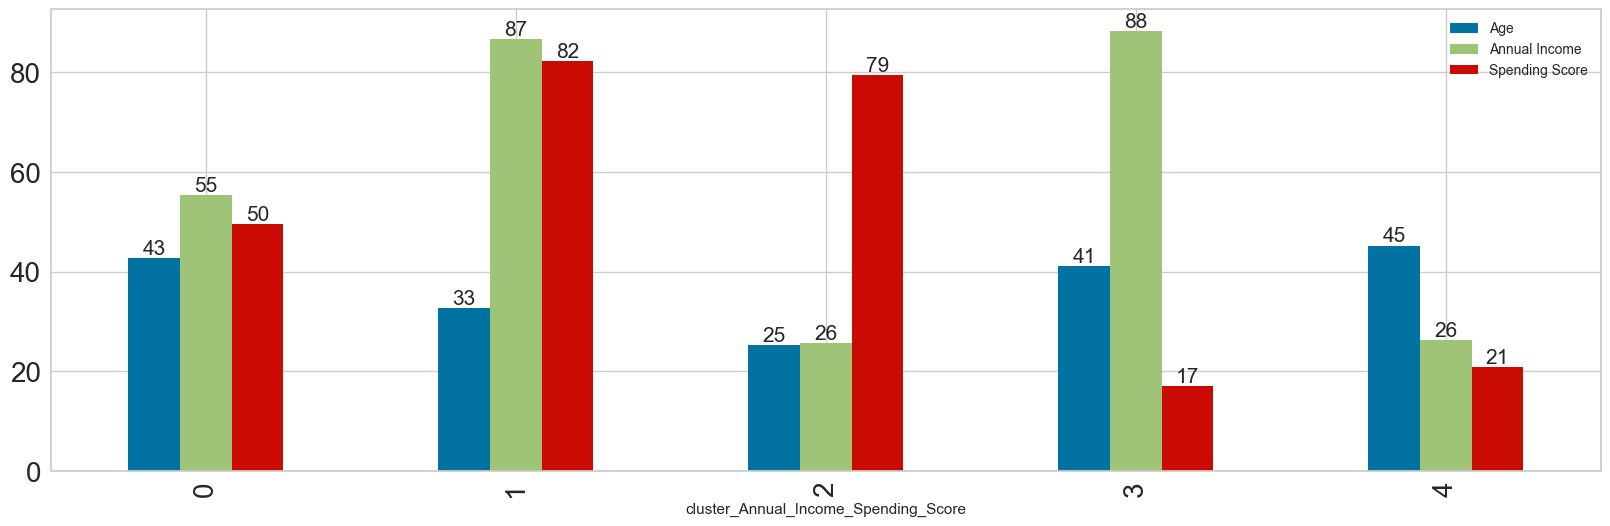

In [313]:
ax = df13.drop(columns = 'Gender').groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

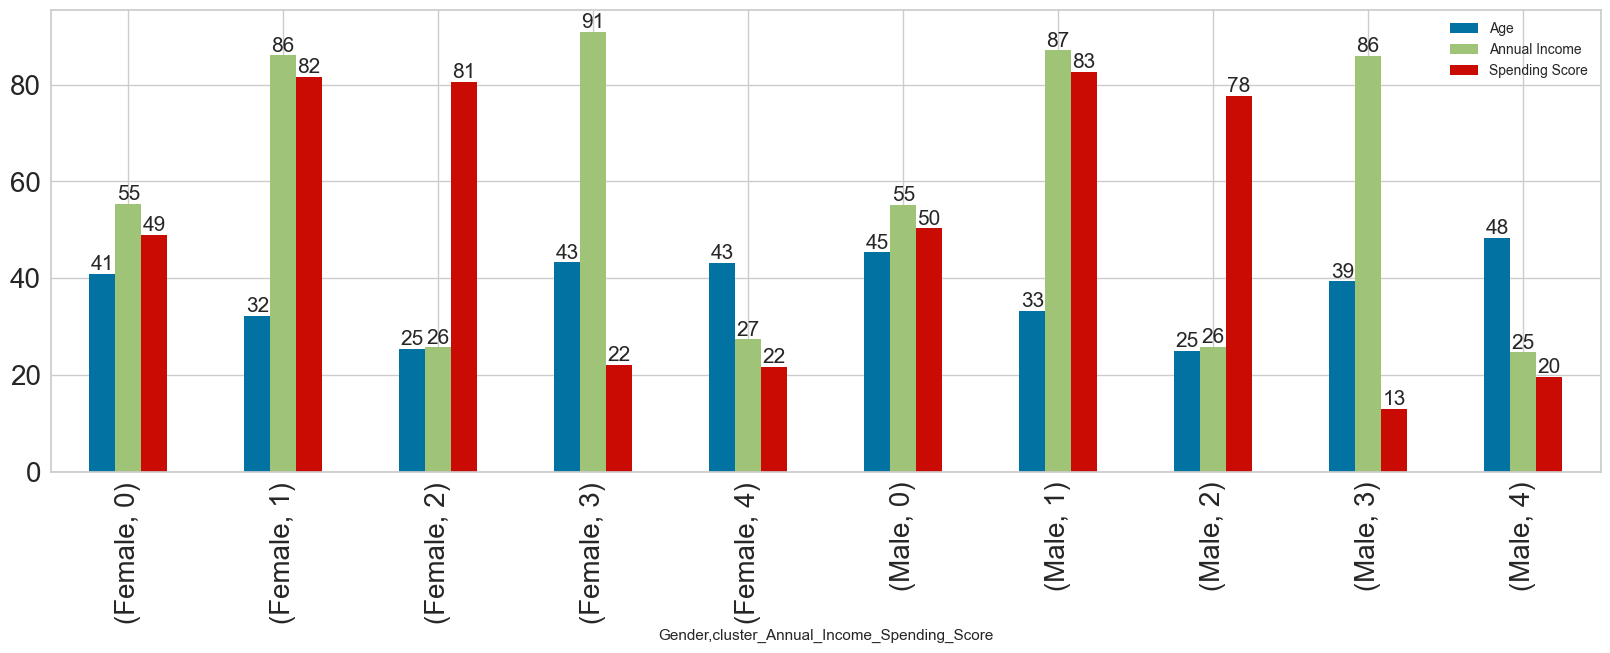

In [314]:
ax = df13.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)

for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

#here we are gong to use .groupby().mean() in order to interpretate the model results with clusters

### Conclusion

**cluster 0** : The average age is around 43, females, seems to have slightly higher spending_scores. however,  the overall results in cluster 0 are in average and we can do some thing to incease their activity and loyality.

**cluster 1**: The average age is around 33, both gender are having a very high annula_income and spending_scoresis and they have higher scores than any other clusters, so that tell us that this cluster include our loyal customers and we work on keep them and give them a special treatment.

**cluster 2** :The average age is around 25. very Low annual_incomes but very high spending scores. This means that people in this clusters are youths and they
do a lot of shopping, but they do not bring much profit.

**cluster 3**: The average age is around 41. the annual_income is very high but the spending_scores is very low. that's mean that they are our tharget customers that we wanted to identefies, we need to work on a strategic plan to make them increase their scores.

**cluster 4**: The average age is around 45, the annual_income and the spending_scores are very low. It can be directed to shopping with gift certificates.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4a84edac-0c18-40c0-b96e-7bf5338c7645' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>